In [1]:

get_ipython().system(' pip install citipy')
import matplotlib.pyplot as plt
from api_keys import weather_api_key
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import urllib
import json
from citipy import citipy

temp_units = "imperial"
output_data_file = "WeatherPy.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)




In [2]:
### Generate the Cities List by Using the `citipy` Library

In [3]:
lat_lngs = []
cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


In [4]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
appid = weather_api_key
settings = {"units": "imperial", "appid": weather_api_key}
url = f"{url}appid={weather_api_key}&units={units}"
print (url)

http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial


In [6]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yerofey pavlovich
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=yerofey%20pavlovich
Processing Record 2 of Set 1 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=cape%20town
Processing Record 3 of Set 1 | alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=alta%20floresta
Processing Record 4 of Set 1 | iralaya
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=iralaya
Processing Record 5 of Set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=hilo
Processing Record 6 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=mataura
Proc

Processing Record 3 of Set 2 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=thompson
Processing Record 4 of Set 2 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=alofi
Processing Record 5 of Set 2 | adelaide
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=adelaide
Processing Record 6 of Set 2 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=atuona
Processing Record 7 of Set 2 | asau
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=asau
Processing Record 8 of Set 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=ushuaia
Processing Record 9 of Set 2 | nelson bay
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87f

City not found...
Processing Record 7 of Set 3 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=puerto%20ayora
Processing Record 8 of Set 3 | albany
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=albany
Processing Record 9 of Set 3 | sheridan
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=sheridan
Processing Record 10 of Set 3 | la macarena
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=la%20macarena
Processing Record 11 of Set 3 | pangody
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=pangody
Processing Record 12 of Set 3 | taltal
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=taltal
Processing Record 13 of Set 3 | port elizabeth
http://api.o

Processing Record 10 of Set 4 | mulchen
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=mulchen
Processing Record 11 of Set 4 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=saskylakh
Processing Record 12 of Set 4 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=meulaboh
Processing Record 13 of Set 4 | eureka
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=eureka
Processing Record 14 of Set 4 | port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=port%20macquarie
Processing Record 15 of Set 4 | chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=chernyshevskiy
Processing Record 16 of Set 4 | torbay
http://api.openweathe

Processing Record 14 of Set 5 | zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=zhigansk
Processing Record 15 of Set 5 | filadelfia
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=filadelfia
Processing Record 16 of Set 5 | wichian buri
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=wichian%20buri
Processing Record 17 of Set 5 | obihiro
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=obihiro
Processing Record 18 of Set 5 | kingman
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=kingman
Processing Record 19 of Set 5 | roald
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=roald
Processing Record 20 of Set 5 | acarau
http://api.openweathermap.org/data/2.5/

Processing Record 18 of Set 6 | keetmanshoop
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=keetmanshoop
Processing Record 19 of Set 6 | champerico
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=champerico
Processing Record 20 of Set 6 | chicama
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=chicama
Processing Record 21 of Set 6 | morant bay
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=morant%20bay
Processing Record 22 of Set 6 | zeya
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=zeya
Processing Record 23 of Set 6 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=saint%20george
Processing Record 24 of Set 6 | jodhpur
http://api.openweatherma

Processing Record 21 of Set 7 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=hofn
Processing Record 22 of Set 7 | tranas
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=tranas
Processing Record 23 of Set 7 | stornoway
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=stornoway
Processing Record 24 of Set 7 | maumere
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=maumere
Processing Record 25 of Set 7 | magdalena
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=magdalena
Processing Record 26 of Set 7 | kapit
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=kapit
Processing Record 27 of Set 7 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?appid=d3

Processing Record 26 of Set 8 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=vaitupu
City not found...
Processing Record 27 of Set 8 | najran
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=najran
Processing Record 28 of Set 8 | carndonagh
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=carndonagh
Processing Record 29 of Set 8 | yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=yeppoon
Processing Record 30 of Set 8 | xudat
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=xudat
Processing Record 31 of Set 8 | nyurba
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=nyurba
Processing Record 32 of Set 8 | rockland
http://api.openweathermap.org/data/2.

Processing Record 30 of Set 9 | kasra
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=kasra
City not found...
Processing Record 31 of Set 9 | mehran
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=mehran
Processing Record 32 of Set 9 | ocampo
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=ocampo
Processing Record 33 of Set 9 | zapolyarnyy
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=zapolyarnyy
Processing Record 34 of Set 9 | voh
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=voh
Processing Record 35 of Set 9 | ekhabi
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=ekhabi
Processing Record 36 of Set 9 | taitung
http://api.openweathermap.org/data/2.5/weather

Processing Record 35 of Set 10 | valladolid
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=valladolid
Processing Record 36 of Set 10 | rizhao
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=rizhao
Processing Record 37 of Set 10 | balsas
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=balsas
Processing Record 38 of Set 10 | bac lieu
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=bac%20lieu
Processing Record 39 of Set 10 | kawalu
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=kawalu
Processing Record 40 of Set 10 | sainte-maxime
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=sainte-maxime
Processing Record 41 of Set 10 | raudeberg
http://api.openweathermap.org

Processing Record 38 of Set 11 | shakawe
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=shakawe
Processing Record 39 of Set 11 | chapais
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=chapais
Processing Record 40 of Set 11 | arlit
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=arlit
Processing Record 41 of Set 11 | syracuse
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=syracuse
Processing Record 42 of Set 11 | rio grande
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=rio%20grande
Processing Record 43 of Set 11 | burpengary
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=burpengary
Processing Record 44 of Set 11 | omboue
http://api.openweathermap.org/data/2

Processing Record 41 of Set 12 | lalibela
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=lalibela
Processing Record 42 of Set 12 | paradwip
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=paradwip
City not found...
Processing Record 43 of Set 12 | lyubech
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=lyubech
Processing Record 44 of Set 12 | rio bueno
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=rio%20bueno
Processing Record 45 of Set 12 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=krasnoselkup
Processing Record 46 of Set 12 | hammerfest
http://api.openweathermap.org/data/2.5/weather?appid=d39577f89f87ff07af3c54b841998d29&units=imperial&q=hammerfest
Processing Record 47 of Set 12 | khorixas
ht

In [50]:
city_data_pd = pd.DataFrame(city_data)

city_data_pd.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [51]:

city_data_pd.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yerofey pavlovich,53.9667,121.9667,38.88,40,55,6.51,RU,1681875926
1,cape town,-33.9258,18.4232,65.12,79,0,4.61,ZA,1681875412
2,alta floresta,-9.8756,-56.0861,72.23,97,100,2.53,BR,1681875927
3,iralaya,15.0000,-83.2333,79.05,76,1,9.98,HN,1681875927
4,hilo,19.7297,-155.0900,78.28,83,75,10.36,US,1681875213


In [52]:
# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Read saved data
city_data_pd = pd.read_csv("WeatherPy.csv",index_col=0)

# Display sample data
city_data_pd.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
yerofey pavlovich,53.9667,121.9667,38.88,40,55,6.51,RU,1681875926
cape town,-33.9258,18.4232,65.12,79,0,4.61,ZA,1681875412
alta floresta,-9.8756,-56.0861,72.23,97,100,2.53,BR,1681875927
iralaya,15.0000,-83.2333,79.05,76,1,9.98,HN,1681875927
hilo,19.7297,-155.0900,78.28,83,75,10.36,US,1681875213


In [53]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

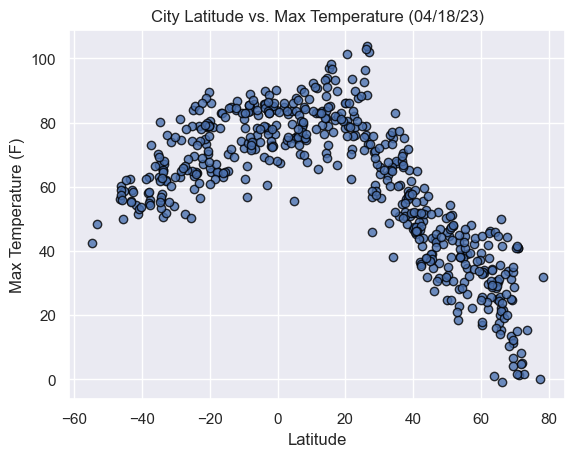

In [54]:
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)"% time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()
plt.show()

In [55]:
#### Latitude Vs. Humidity

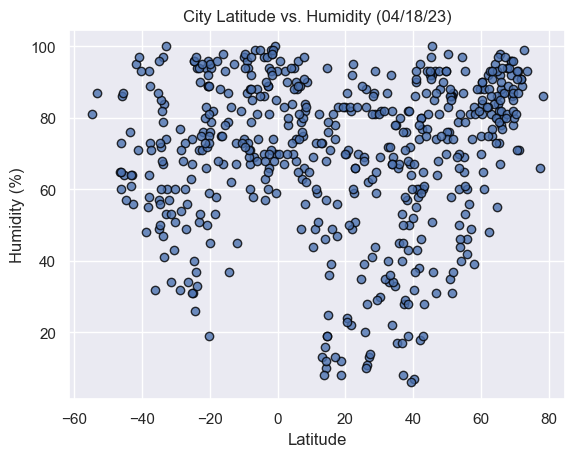

In [56]:
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

plt.show()

In [57]:
#### Latitude Vs. Cloudiness

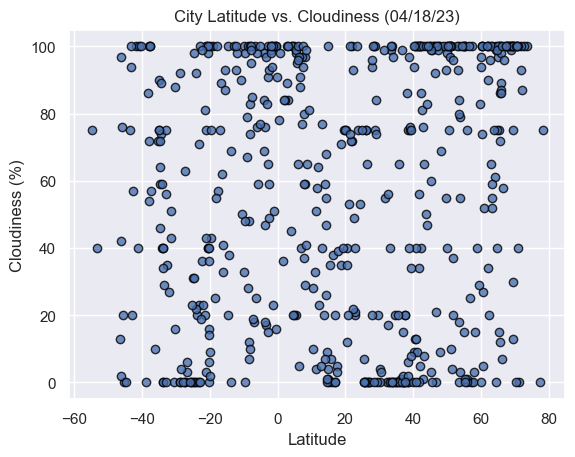

In [58]:
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

plt.show()

In [59]:
#### Latitude vs. Wind Speed Plot

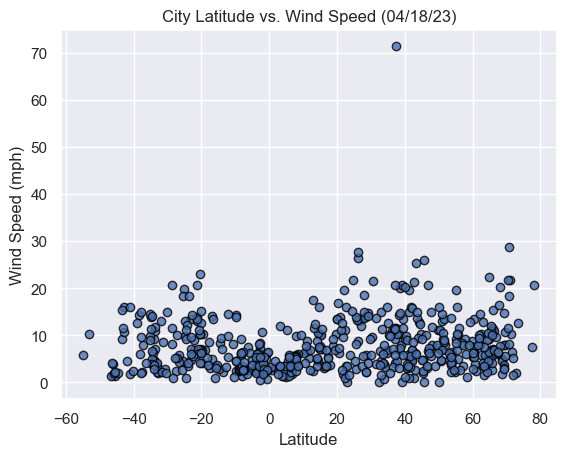

In [60]:
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

plt.show()

In [61]:
## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
northern_hemi_df = city_data_pd[city_data_pd['Lat'] >= 0]
northern_hemi_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
yerofey pavlovich,53.9667,121.9667,38.88,40,55,6.51,RU,1681875926
iralaya,15.0000,-83.2333,79.05,76,1,9.98,HN,1681875927
hilo,19.7297,-155.0900,78.28,83,75,10.36,US,1681875213
colares,38.7992,-9.4469,65.39,50,97,8.01,PT,1681875838
mana,5.6592,-53.7767,75.97,88,95,2.55,GF,1681875551


In [63]:
southern_hemi_df = city_data_pd[city_data_pd['Lat'] < 0]
southern_hemi_df.head()



,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
cape town,-33.9258,18.4232,65.12,79,0,4.61,ZA,1681875412
alta floresta,-9.8756,-56.0861,72.23,97,100,2.53,BR,1681875927
mataura,-46.1927,168.8643,60.17,60,42,1.48,NZ,1681875405
hobart,-42.8794,147.3294,58.86,64,20,16.11,AU,1681875415
punta arenas,-53.1500,-70.9167,48.31,87,40,10.36,CL,1681875396


In [64]:
###  Temperature vs. Latitude Linear Regression Plot

In [65]:
# Linear regression on Northern Hemisphere

The r-squared is: 0.79


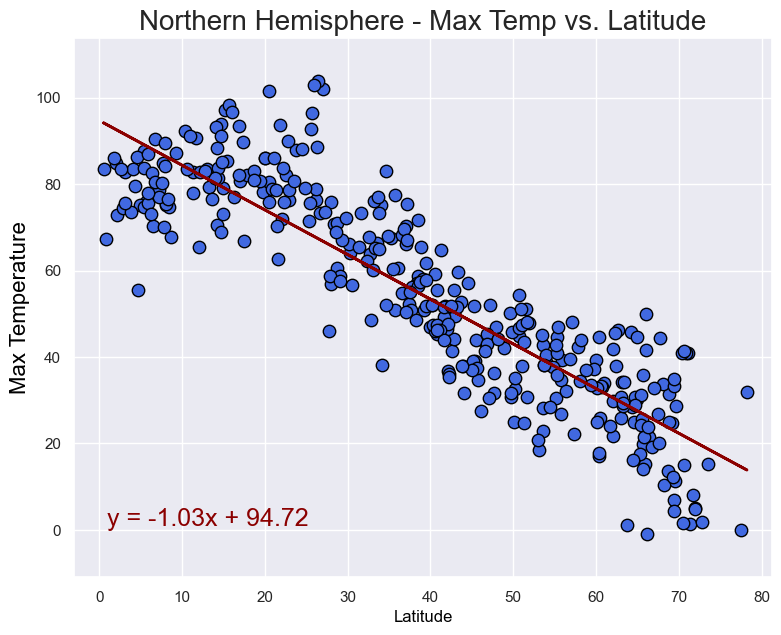

In [66]:
plt.figure(figsize=(9,7))
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

linear_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[80], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)


plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=12, color='black')
plt.annotate(linear_eq,(1, 1), fontsize=18, color='darkred')

plt.ylim(min(city_data_pd['Max Temp'])-10, max(city_data_pd['Max Temp'])+10)

plt.xlim(-3, max(city_data_pd['Lat'])+3)
print(f'The r-squared is: {round(rvalue**2,2)}')


plt.show()

In [67]:
# Discussion: The r - squared is: 0.81.
#There is a strong negative correlation between max temperature and latitude on the Northern Hemisphere. Farther north from equator the position of a city the lower is the max temperature.

In [68]:
#Linear regression on Southern Hemisphere

The r-squared is: 0.48


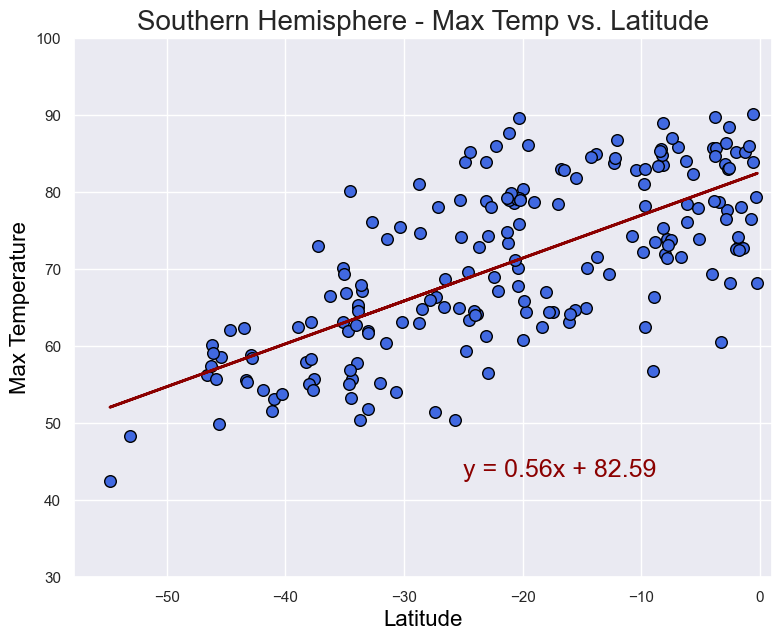

In [69]:
plt.figure(figsize=(9,7))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43),fontsize=18, color='darkred')


plt.ylim(30, 100)

plt.xlim(min(southern_hemi_df['Lat'])-3, +1)
print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

In [70]:
# Discussion: There is a positive correlation between latitude and max temperature on the Southern Hemisphere. 
# The closer a city is to equator the higher is the max temperature. Variance of the maximum temp on the Southern Hemisphere is higher than on the Northern Hemisphere and there is maximum temperature variation for different cities positioned on same latitude.

In [71]:
#Northern Hemisphere - Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07


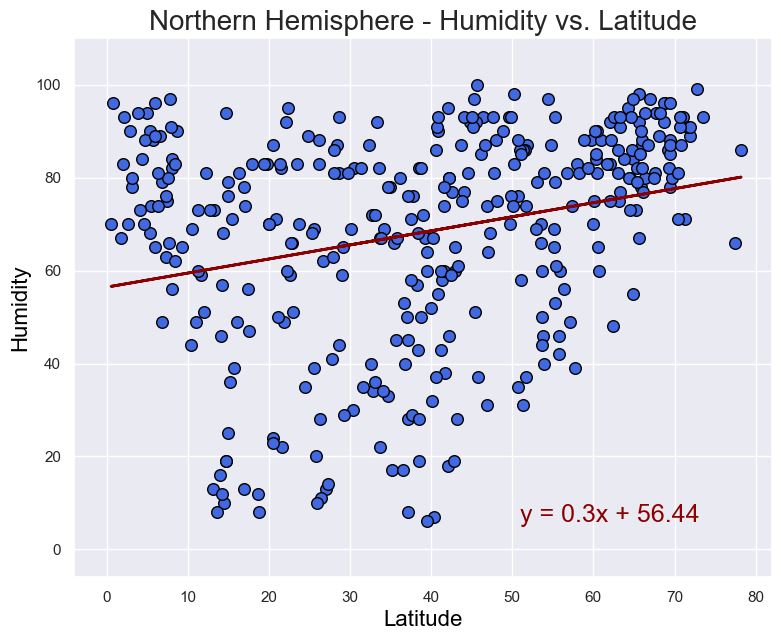

In [72]:
plt.figure(figsize=(9,7))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

plt.title('Northern Hemisphere - Humidity vs. Latitude', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')

plt.ylim(-6, 110)

plt.xlim(-4, 82)
print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

In [73]:
#Discussion: The r - squared is: 0.03.There is almost no correlation between humidity level and the city position moving north from the equator.

In [74]:
#Southern Hemisphere - Humidity vs. Latitude Linear Regression

The r-squared is: 0.08


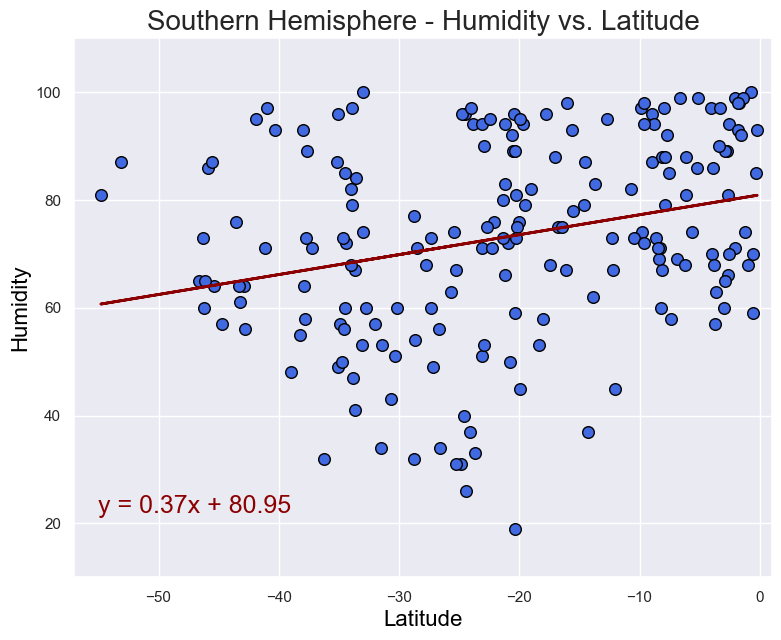

In [75]:
plt.figure(figsize=(9,7))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)


plt.title('Southern Hemisphere - Humidity vs. Latitude', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize=18, color='darkred')


plt.ylim(10, 110)

plt.xlim(-57, 1)
print(f'The r-squared is: {round(rvalue**2,2)}')
plt.show()

In [76]:
#Discussion: The r - squared is: 0.09.There is almost no correlating between humidity levels and the city position on Southern Hemisphere.

In [77]:
#Northern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04


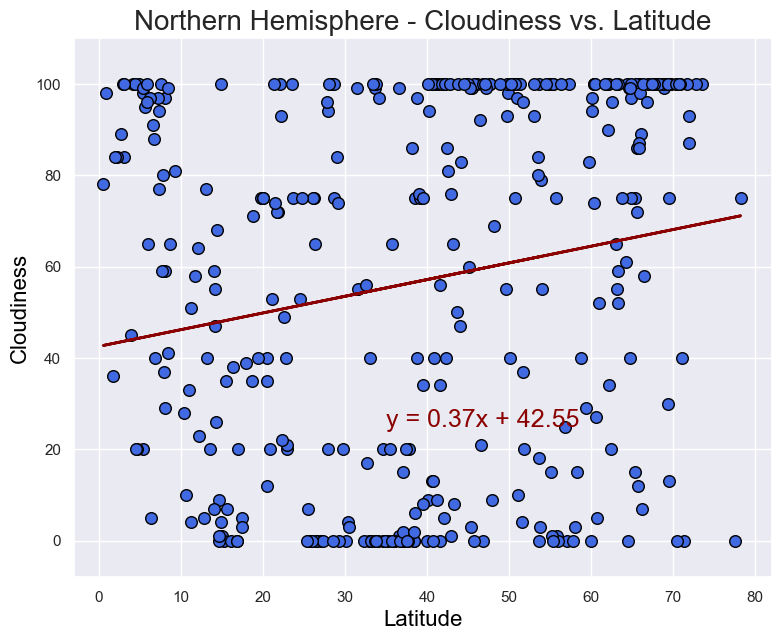

In [78]:
plt.figure(figsize=(9,7))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept


line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)


plt.title('Northern Hemisphere - Cloudiness vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')

plt.ylim(-8, 110)

plt.xlim(-3, 82)

print(f'The r-squared is: {round(rvalue**2,2)}')


plt.show()

In [79]:
#Discussion:The r - squared is: 0.04.
#There is no correlation between the cloudiness and a distance from equator for cities positions. 
# Cloudiness are widely spread all over latitudes along whole Northern Hemisphere.

In [80]:
# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

The r-squared is: 0.05


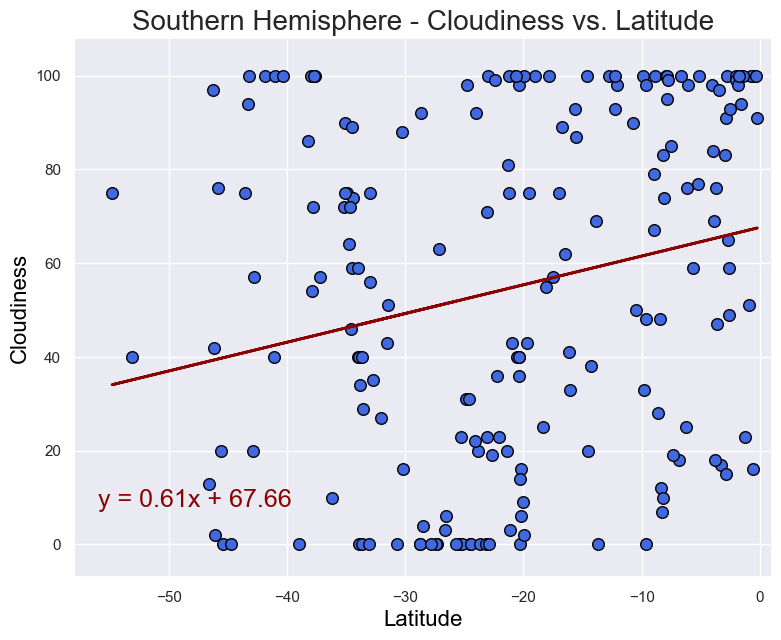

In [81]:
plt.figure(figsize=(9,7))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

plt.title('Southern Hemisphere - Cloudiness vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')


plt.ylim(-7, 108)
plt.xlim(-58, 1)


print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

In [82]:
# Discussion: The r-squared is: 0.02. There is no correlation between cloudiness level and a latitude on Southern Hemisphere. 
# The level of cloudiness is ranging from 0% to 100% independent of the latitude.

In [83]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.02


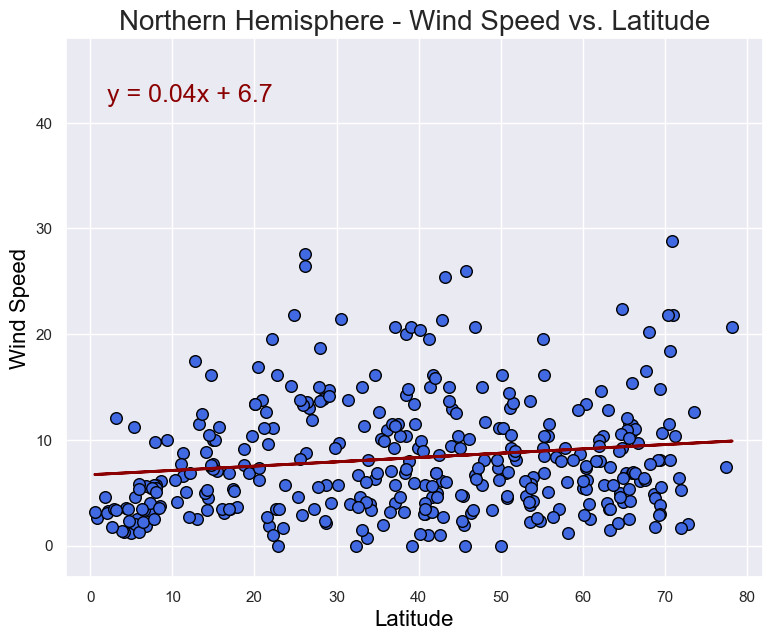

In [84]:
plt.figure(figsize=(9,7))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='darkred')


plt.ylim(-3, 48)
plt.xlim(-3, 82)

print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

In [85]:
# Discussion: The r - squared is: 0.05
# There is low correlation between the wind speed and the latitude on Northern Hemisphere.
# Most of the cities have winds with variable speed levels along whole of the Northern Hemisphere.

In [86]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05


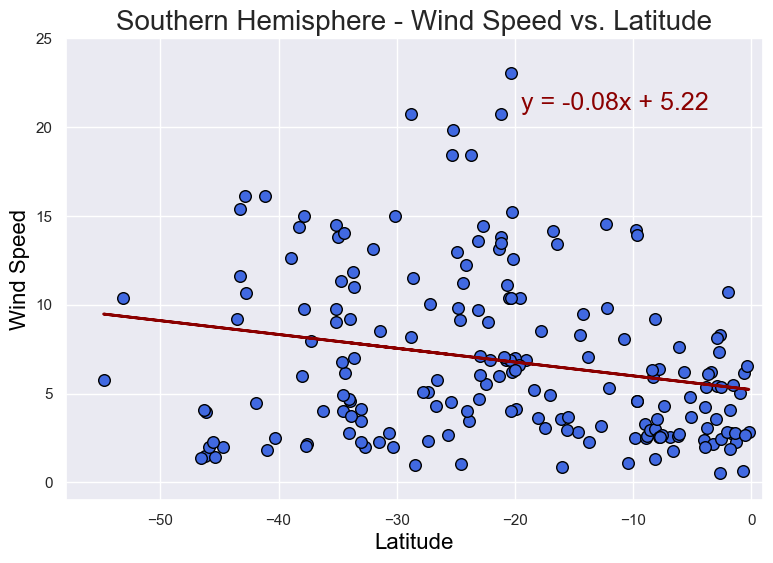

In [87]:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')


plt.ylim(-1, 25)
plt.xlim(-58, 1)

print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

In [88]:
#Discussion: The r - squared is: 0.06
# There is low negative correlation between a wind speed and the latitude on Southern Hemisphere. 
